In [1]:
#Import modules
import pyodbc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot

import seaborn as sns

from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

#1 = Sliding
#0 = Rotating

# Engels Questions

## What is error
## How do we show the event prior to the event
## Quantative measurement based on time and depth
## Time series

## start model on just time then distance or vice versus then maybe both if needed

## want to be early on prediction and never late
## use absolute time differential before concentrating 
#


# Data Import

In [2]:
#Connect to DB
conn = pyodbc.connect('Driver={SQL Server};'
                      #'Server=DESKTOP-LFP2E23\SQLEXPRESS;'
                      'Server=jvsql02;'
                      'Database=ML;'
                      'Trusted_Connection=yes;')

#Select the data from the table
SQL_Query = pd.read_sql_query(
'''select * from ML.dbo.TCR_ML_WELLS_Time_Analysis_Full''', conn)

In [3]:
#Convert the query to a data frame
df_raw = pd.DataFrame(SQL_Query, columns=              
    [
        'WellName','ReportDateTime','AccumulatedConnectionTime','AccumulatedFillupStrokes','AccumulatedFillupVolume'
,'ADAutoDrillerRunning','ADAuxiliary1','ADAuxiliary2','ADAuxiliary3','ADAuxiliary4','ADAuxiliary5'
,'ADDifferentialPressureActualValue','ADDifferentialPressureLimitValue','ADDifferentialPressureSetpointValue','ADDPEnabled'
,'ADHookloadSlider','ADROPActualValue','ADROPCruiseControlEnabled','ADROPSetpointValue','ADSPPSlider','ADSystemEnabled'
,'ADWOBActualValue','ADWOBEnabled','ADWOBLimitValue','ADWOBSetpointValue','BitArea','BitNozzleTotalFlowArea','BitRPM'
,'BitTime_OffBottom','BitTime_OnBottom','BlockPosition','CasingPressure','CoilEngaged','ConnectionCounter'
,'CurrentConnectionTime','Date','DateDateOnly','DateTimeOnly','Depth_Bit','DepthHoleTVD','DifferentialPressure'
,'DrillCabTDSUTemp','DrillMode','DynamicVariable06','DynamicVariable09','DynamicVariable10','EC1Active','EC1ActivityCode1'
,'EC1ActivityCode2','EC1ActivityCode3','EC1ActivityCode4','EC1ActivityCode5','EC1Authorized','EC1DPModeOn','EC1DPModeOnReq'
,'EC1DPSPActual','EC1DPSPRecommended','EC1Ready','EC1ROPSPActual','EC1ROPSPRecommended','EC1WOBModeOn','EC1WOBModeOnReq'
,'EC1WOBSPActual','EC1WOBSPRecommended','FlowIn','GasTotal_units','H2S04','H2S08','H2S09','H2S11','Hookload'
,'HookloadInline','HookloadString','JobPumpVolumeTotal','JobStrokesTotal','LagDepthGas','LEL01','LEL02','LEL03','LEL04'
,'LEL05','LEL06','LEL07','LEL08','LEL09','LEL10','LEL11','LEL12','MudMotorRPM','MWDAzimuth'
,'MWDContinuousInclination','MWDGammaAPI','MWDInclination','MWDSrvToolfaceAdvisory','MWDSrvToolfaceLimits'
,'OnBottom','OverPull','Pit01Volume','Pit02Volume','Pit03Volume','Pit04Volume','Pit05GL','Pit06Volume','Pit07Volume'
,'PitGLActive','PitGLCompanyMan','PitGLMudLogger','PitGLMWD','PitGLSignature','PitVolumeActive','PitVolumeTotal'
,'PLCStatus','PreviousConnectionTime','PumpOffTime','PumpOnTime','PumpPressure','PumpsOn','PumpVolumeTotal','ReturnFlow'
,'ReturnFlowDetected','REVitEnabled','REVitUsageAlert','ROCKIT_BearingActualRW','ROCKIT_HITRQLeft','ROCKIT_HITRQLeftPercent'
,'ROCKIT_HITRQRight','ROCKIT_HITRQRightPercent','ROCKIT_OnOff','ROCKIT_OscillationLeftRW','ROCKIT_OscillationRightRW'
,'ROCKIT_PILOTOnOff','ROCKIT_ResultantToolface','ROCKIT_RPMRW','ROCKIT_ScoreCardRW','ROCKIT_SlidetoMDRW','ROCKIT_TFtoRW'
,'ROP5xDepthhour','ROPDepth_StepDepthHour','ROPDepthHour','ROPMax','ROPMinuteDepth','ROPTimeDepthHour','RotaryRPM'
,'RunningSpeedDown','RunningSpeedUp','SeperatorFlow','SlipsSet','SPM1','SPM2','SPMTotal','StaticInjectorForce'
,'STCfActualNm_Sec','STKfActualNm','Strokes1','Strokes1CompanyMan','Strokes2','Strokes2CompanyMan','StrokesTotal'
,'StrokesTotalCompanyMan','StrokesTotalMudLogger','TDOilSensorBypassAlarm','TDOilType','TDPLCAlarm1','TDPLCAlarm4'
,'TDQuillPosition','TDS_AmbientTemperature','TDS_BrakeTemperature','TDS_HPUOilTankTemperature','TDS_HydraulicTemperature'
,'TDS_LowerBearingTemp','TDS_LubeOilAfterFilterPres','TDS_LubeOilPressure','TDS_LubeOilTemperature'
,'TDS_MotorWindingTemperature1','TDS_MotorWindingTemperature2','TDS_MotorWindingTemperature3ACOnly'
,'TDS_OilPressureAcrosstheFilter','TDS_UpperBearingTemp','TDSRotaryTorqueLimit','TDTorqueInline','TongMakeupStartPressure'
,'TonMilesEventCumulative','TonMilesMegajoules','TopDriveRPM','TopDriveRPMCommand','TopDriveTorqueCommand'
,'TopDriveTorqueft_lbs','TorqueDelta','TorqueTare','TripGL','TripGLCompanyMan','TripGLSignature','TripModeAccumulation'
,'TripModeFillupStrokes','TripVolumeActive','UnderPull','VFDVariable10','VFDVariable9','WeightonBit'
            ])



In [4]:
df_raw.head(2)

,WellName,ReportDateTime,AccumulatedConnectionTime,AccumulatedFillupStrokes,AccumulatedFillupVolume,ADAutoDrillerRunning,ADAuxiliary1,ADAuxiliary2,ADAuxiliary3,ADAuxiliary4,...,TripGL,TripGLCompanyMan,TripGLSignature,TripModeAccumulation,TripModeFillupStrokes,TripVolumeActive,UnderPull,VFDVariable10,VFDVariable9,WeightonBit
0,LANGE_A_N048HM_TIME.csv,2018-07-19 19:27:20,3.613368e+09,0.0,0.0,-1.0,65.026100,60.0,0.0,256.0,...,2.75318,-36.650749,3.614740e+09,0.0,0.0,3.62847,0.0,0.0,0.0,22.928080
1,LANGE_A_N048HM_TIME.csv,2018-07-19 19:27:30,3.613368e+09,0.0,0.0,-1.0,64.834343,60.0,0.0,256.0,...,2.73727,-36.666672,3.614740e+09,0.0,0.0,3.61256,0.0,0.0,0.0,22.223921


### Create Index Column

In [5]:
#Convert the query to a data frame
df_time_indexed = df_raw.set_index('ReportDateTime')
df_time_indexed.head(2)

,WellName,AccumulatedConnectionTime,AccumulatedFillupStrokes,AccumulatedFillupVolume,ADAutoDrillerRunning,ADAuxiliary1,ADAuxiliary2,ADAuxiliary3,ADAuxiliary4,ADAuxiliary5,...,TripGL,TripGLCompanyMan,TripGLSignature,TripModeAccumulation,TripModeFillupStrokes,TripVolumeActive,UnderPull,VFDVariable10,VFDVariable9,WeightonBit
ReportDateTime,,,,,,,,,,,,,,,,,,,,,
2018-07-19 19:27:20,LANGE_A_N048HM_TIME.csv,3.613368e+09,0.0,0.0,-1.0,65.026100,60.0,0.0,256.0,42.0,...,2.75318,-36.650749,3.614740e+09,0.0,0.0,3.62847,0.0,0.0,0.0,22.928080
2018-07-19 19:27:30,LANGE_A_N048HM_TIME.csv,3.613368e+09,0.0,0.0,-1.0,64.834343,60.0,0.0,256.0,42.0,...,2.73727,-36.666672,3.614740e+09,0.0,0.0,3.61256,0.0,0.0,0.0,22.223921


In [6]:
df_time_indexed.drop([ 'AccumulatedFillupStrokes', 'AccumulatedFillupVolume', 'ADAuxiliary2', 'ADAuxiliary3', 'ADAuxiliary4', 'ADAuxiliary5', 'BitArea', 'BitNozzleTotalFlowArea', 'CoilEngaged', 'CurrentConnectionTime'
, 'DrillMode', 'DynamicVariable09', 'EC1Active', 'EC1ActivityCode1', 'EC1ActivityCode2', 'EC1ActivityCode3', 'EC1ActivityCode4', 'EC1ActivityCode5', 'EC1Authorized', 'EC1DPModeOn', 'EC1DPModeOnReq'
, 'EC1DPSPActual', 'EC1DPSPRecommended', 'EC1Ready', 'EC1ROPSPActual', 'EC1ROPSPRecommended', 'EC1WOBModeOn', 'EC1WOBModeOnReq', 'EC1WOBSPActual', 'EC1WOBSPRecommended', 'H2S08', 'H2S09'
, 'HookloadInline', 'LEL01', 'LEL03', 'LEL05', 'LEL06', 'LEL08', 'LEL09', 'LEL10', 'LEL12', 'MudMotorRPM', 'OnBottom', 'PLCStatus', 'REVitEnabled', 'REVitUsageAlert', 'ROCKIT_PILOTOnOff', 'SlipsSet'
, 'StaticInjectorForce', 'STCfActualNm_Sec', 'STKfActualNm', 'TDOilSensorBypassAlarm', 'TDOilType', 'TDTorqueInline', 'TongMakeupStartPressure', 'TorqueTare', 'UnderPull', 'VFDVariable10', 'VFDVariable9'
, 'H2S04', 'LEL02', 'LEL11', 'SeperatorFlow', 'H2S11', 'Date', 'DateDateOnly', 'DateTimeOnly', 'AccumulatedConnectionTime', 'ADAutoDrillerRunning', 'ADDPEnabled', 'ADROPCruiseControlEnabled', 'ADSystemEnabled', 'ADWOBEnabled'
, 'TripModeAccumulation', 'TripModeFillupStrokes', 'ADAuxiliary1'
        ], axis=1, inplace=True)
#, 'ReportDateTime'
#, 'WellName'
#ADAuxiliary1 - removed as per vendor (user defined)

In [7]:
df_time_indexed.drop(['WellName'], axis=1, inplace=True)

In [8]:
#see the dimensions of the data
print("Labels Row Count:",df_time_indexed.shape[0])
print("Labels Column Count:",df_time_indexed.shape[1])

Labels Row Count: 725789
Labels Column Count: 121


In [9]:
#Show first 5 rows of data
df_time_indexed.head(2)

,ADDifferentialPressureActualValue,ADDifferentialPressureLimitValue,ADDifferentialPressureSetpointValue,ADHookloadSlider,ADROPActualValue,ADROPSetpointValue,ADSPPSlider,ADWOBActualValue,ADWOBLimitValue,ADWOBSetpointValue,...,TopDriveRPM,TopDriveRPMCommand,TopDriveTorqueCommand,TopDriveTorqueft_lbs,TorqueDelta,TripGL,TripGLCompanyMan,TripGLSignature,TripVolumeActive,WeightonBit
ReportDateTime,,,,,,,,,,,,,,,,,,,,,
2018-07-19 19:27:20,260.875885,850.0,420.0,1.0,13.85443,90.0,1.0,21.675610,32.0,22.0,...,65.068710,65.068710,7801.826660,7801.826660,8106.402832,2.75318,-36.650749,3.614740e+09,3.62847,22.928080
2018-07-19 19:27:30,238.689758,850.0,420.0,1.0,67.49762,90.0,1.0,22.071711,32.0,22.0,...,64.994141,64.994141,8277.098633,8277.098633,10024.226562,2.73727,-36.666672,3.614740e+09,3.61256,22.223921


# Create Features and Labels

In [10]:
label_column =  'ROCKIT_OnOff'

features = df_time_indexed.dropna().drop([label_column], axis=1)
#features = df.dropna().drop([label_column, 'ROCKIT_RPMRW'], axis=1)
labels = df_time_indexed.dropna()[label_column]

X = features.values
y = labels.values

#1 = Sliding
#0 = Rotating

# Grid Search Start -- Do not have to run again

In [11]:
#--params = {'max_depth':[5, 10, 15], 'min_samples_split':[2, 4, 8]}

#--clf = DecisionTreeClassifier()

#--grid = GridSearchCV(clf, params, cv=10)

In [12]:
#To run on small sample set
##grid.fit(X[:500], y[:500])

#to run on full data set
#--grid.fit(X, y)

In [13]:
#--best_dt = grid.best_estimator_
#--best_dt

In [14]:
#--grid.best_params_

#### Grid Search Results: 
    * Max Depth = 5
    * Min Samples = 8
## Grid Search End -- Do not have to run again

In [15]:
#

# Feature Reduction
## Create Labels

In [16]:
label_column =  'ROCKIT_OnOff'

#fill in max depth and min samples with above numbers
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=8)

#After grid search is done you can use the object for descion tree fits
#dt = grid.best_estimator_

In [17]:
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Create indices
### Non zero importances

In [18]:
#index feature importance
feature_importances = dt.feature_importances_

#Get non zero indicies to filter with
nz_indices = np.argwhere(feature_importances > 0)
nz_features = features.columns[nz_indices].values.flatten()
nz_importances = feature_importances[nz_indices].flatten()

In [19]:
#Find the most importance features number
#nz_features[ np.argmax(nz_importances) ]
#nz_importances.max()

print("Max non-zero feature name = "+ nz_features[ np.argmax(nz_importances) ])
print("Max non-zero feature value = %s" % nz_importances.max())

Max non-zero feature name = ROCKIT_RPMRW
Max non-zero feature value = 0.8541623398246568


### Top quartiles analysis

In [20]:
imp = pd.Series(nz_importances)
desc = imp.describe()
desc

count    22.000000
mean      0.045455
std       0.181028
min       0.000007
25%       0.000405
50%       0.003005
75%       0.004745
max       0.854162
dtype: float64

In [21]:
#Function to run percent analysis
def rank(imp, perc, remove_outlier=True):
    if remove_outlier:
        imp = imp[imp < imp.max()]
   
    desc = imp.describe()
    if type(perc) == str:
        top = imp[ imp >=  desc[perc]]
    else:
        top = imp[ imp >= perc]
    
    # N top features
    n_top = top.shape[0]
    
    # Total variation explanation
    var_expl = top.sum() / imp.sum()
    
    return n_top, var_expl

### Save the features and variance to object

In [22]:
#Create variables that shows features and variances
#Number of features, fractioned explained by variance

# True (default) = removes outlier
# False = Keeps outlier

Perc25_NoOutlier = rank(imp, '25%')
Perc50_NoOutlier = rank(imp, '50%')
Perc75_NoOutlier = rank(imp, '75%')


Perc25_WithOutlier = rank(imp, '25%', False)
Perc50_WithOutlier = rank(imp, '50%', False)
Perc75_WithOutlier = rank(imp, '75%', False)

### Features & Variance with no Outliers

In [23]:
print(f'25% Quartile with no outlier include {Perc25_NoOutlier[0]} features and explains {round(Perc25_NoOutlier[1]*100, 3)}% of the variance')
print(f'50% Quartile with no outlier include {Perc50_NoOutlier[0]} features and explains {round(Perc50_NoOutlier[1]*100, 3)}% of the variance')
print(f'75% Quartile with no outlier include {Perc75_NoOutlier[0]} features and explains {round(Perc75_NoOutlier[1]*100, 3)}% of the variance')

25% Quartile with no outlier include 16 features and explains 99.613% of the variance
50% Quartile with no outlier include 11 features and explains 97.714% of the variance
75% Quartile with no outlier include 6 features and explains 85.955% of the variance


### Features & Variance with Outliers

In [24]:
print(f'25% Quartile with outlier include {Perc25_WithOutlier[0]} features and explains {round(Perc25_WithOutlier[1]*100, 3)}% of the variance')
print(f'50% Quartile with outlier include {Perc50_WithOutlier[0]} features and explains {round(Perc50_WithOutlier[1]*100, 3)}% of the variance')
print(f'75% Quartile with outlier include {Perc75_WithOutlier[0]} features and explains {round(Perc75_WithOutlier[1]*100, 3)}% of the variance')

25% Quartile with outlier include 16 features and explains 99.906% of the variance
50% Quartile with outlier include 11 features and explains 99.37% of the variance
75% Quartile with outlier include 6 features and explains 97.513% of the variance


### Top 25% Features

<BarContainer object of 11 artists>

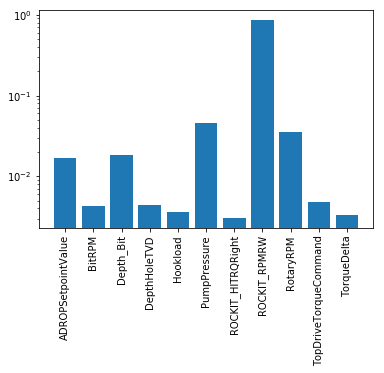

In [25]:
#Apply threshold to only use top 25% of features
#threshold = desc['75%'] #Top 25% quartile
threshold = desc['50%'] #Top 50% quartile
#threshold = desc['25%'] #Top 75% quartile

top_indices = np.argwhere(nz_importances > threshold)
top_features = nz_features[top_indices].flatten()
top_importances = nz_importances[top_indices].flatten()

#Plot the data
plt.xticks(rotation=90)
plt.bar(top_features, top_importances, log=True)

### Sort the data by size

<BarContainer object of 11 artists>

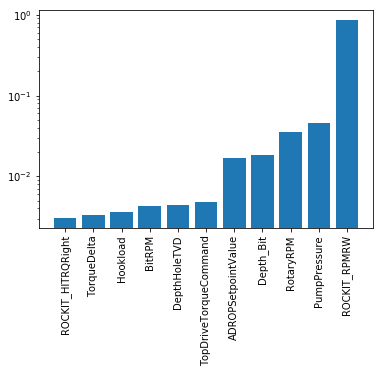

In [26]:
sorted_indices = np.argsort(top_importances)
sorted_features = top_features[sorted_indices]
sorted_importances = top_importances[sorted_indices]

#Plot the sorted values
plt.xticks(rotation=90)
plt.bar(sorted_features, sorted_importances, log=True)

In [27]:
sorted_features

array(['ROCKIT_HITRQRight', 'TorqueDelta', 'Hookload', 'BitRPM',
       'DepthHoleTVD', 'TopDriveTorqueCommand', 'ADROPSetpointValue',
       'Depth_Bit', 'RotaryRPM', 'PumpPressure', 'ROCKIT_RPMRW'],
      dtype=object)

# Data Frame of Top Features

In [28]:
#Top features in Data Frame
reduced_features = features[sorted_features]
reduced_features.head(2)

,ROCKIT_HITRQRight,TorqueDelta,Hookload,BitRPM,DepthHoleTVD,TopDriveTorqueCommand,ADROPSetpointValue,Depth_Bit,RotaryRPM,PumpPressure,ROCKIT_RPMRW
ReportDateTime,,,,,,,,,,,
2018-07-19 19:27:20,4370.0,8106.402832,126.568260,65.026100,7699.095215,7801.826660,90.0,7699.096680,65.026100,2158.405273,65.0
2018-07-19 19:27:30,4370.0,10024.226562,127.336578,64.834343,7699.225098,8277.098633,90.0,7699.225098,64.834343,2163.194824,65.0


In [29]:
#Put values in array for models
X_reduced = reduced_features.values

In [30]:
#Object Shapes
print("Labels Row Count:",labels.shape[0])
print("Features Row Count:",reduced_features.shape[0])
print("Features Column Count:",reduced_features.shape[1])

Labels Row Count: 690102
Features Row Count: 690102
Features Column Count: 11


## Function to set Classifeir Window

In [31]:
#Function to set classifer window
def window(features, labels=None, window_len=4):
    X, y = [], []
    for i in range(features.shape[0] - window_len):
        start_idx = i
        stop_idx = start_idx + window_len

        window_X = features[start_idx:stop_idx, :]
        X.append(window_X)
        
        if labels is not None:
            window_y = labels[stop_idx]
            y.append(window_y)

    return np.array(X), np.array(y)

## Classification Objects

In [32]:
#Standard Scaler object
scaler = StandardScaler()

In [33]:
#Apply standard scaler to X-reduced data set
X_scaled = scaler.fit_transform(X_reduced)

In [34]:
#set window scale
window_len = 10
X_windowed, y_windowed = window(X_scaled, y, window_len)

In [35]:
X_windowed.shape

(690092, 10, 11)

In [36]:
# count on to flatten features to 2 dimensions
feat_dims = X_windowed.shape[1:]
flat_feat_len = np.product(feat_dims)
flat_feat_len

110

# Create Training and Test Data Sets

In [37]:
#create Classifier Window test/train split data
#X_windowed = X_windowed.reshape((-1, flat_feat_len))
X_train, X_test, y_train, y_test =  train_test_split(X_windowed, y_windowed, train_size=0.7, shuffle=False)

#Flatten the train and test data set
X_train = X_train.reshape((-1, flat_feat_len))
X_test = X_test.reshape((-1, flat_feat_len))

In [38]:
#create Static test/train split data
X_train_st, X_test_st, y_train_st, y_test_st =  train_test_split(X_scaled, y, train_size=0.7, shuffle=False)

# SVM Classifier Window Model Build

In [39]:
### SVM Grid Search if needed after inital model is run

In [40]:
#create SVM Classifier
svm_clf = svm.SVC(kernel='rbf')

In [41]:
#train the model using the training set
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
# Predict the response for test dataset
y_pred = svm_clf.predict(X_test)

### SVM Classifier Window Metrics

In [43]:
# Model Accuracy: how often is the classifier correct?
print("SVM Classifier Window Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("SVM Classifier Window Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("SVM Classifier Window Recall:",metrics.recall_score(y_test, y_pred))

# Model F1 Score
print("SVM Classifier Window F1 Score:",metrics.f1_score(y_test, y_pred))


SVM Classifier Window Accuracy: 0.9899144320709468
SVM Classifier Window Precision: 0.9786617929790415
SVM Classifier Window Recall: 0.9881845416417017
SVM Classifier Window F1 Score: 0.9834001144819692


In [44]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[95395   899]
 [  493 41232]]
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     96294
         1.0       0.98      0.99      0.98     41725

   micro avg       0.99      0.99      0.99    138019
   macro avg       0.99      0.99      0.99    138019
weighted avg       0.99      0.99      0.99    138019



# SVM Static Model Build

In [45]:
## SVM Static Model

In [46]:
#create SVM Classifier
svm_clf_static = svm.SVC(kernel='rbf')

In [47]:
#train the model using the training set
svm_clf_static.fit(X_train_st, y_train_st)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [48]:
#Predict the response for test dataset
y_pred_st = svm_clf_static.predict(X_test_st)

### SVM Static Model Metrics

In [49]:
# Model Accuracy: how often is the classifier correct?
print("SVM Static Model Accuracy:",metrics.accuracy_score(y_test_st, y_pred_st))

# Model Precision: what percentage of positive tuples are labeled as such?
print("SVM Static Model Precision:",metrics.precision_score(y_test_st, y_pred_st))

# Model Recall: what percentage of positive tuples are labelled as such?
print("SVM Static Model Recall:",metrics.recall_score(y_test_st, y_pred_st))

# Model F1 Score
print("SVM Static Model F1 Score:",metrics.f1_score(y_test_st, y_pred_st))

SVM Static Model Accuracy: 0.9963121553966425
SVM Static Model Precision: 0.9892687559354226
SVM Static Model Recall: 0.9986339125224686
SVM Static Model F1 Score: 0.9939292742560677


# ROC / AUC Curves
## Classifier Window Model Build with Probablities

In [50]:
#create SVM Classifier
#--svm_clf_prob = svm.SVC(kernel='rbf', probability=True )

In [ ]:
#train the model using the training set
#--svm_clf_prob.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
#--y_pred_prob = svm_clf_prob.predict(X_test)

In [ ]:
# predict probabilities
#--probs = svm_clf_prob.predict_proba(X_test)
# keep probabilities for the positive outcome only
#--probs = probs[:, 1]


In [ ]:
# calculate AUC
#--auc = roc_auc_score(y_test, probs)
#--print('AUC: %.3f' % auc)
# calculate roc curve
#--fpr, tpr, thresholds = roc_curve(y_test, probs)

In [ ]:
# plot no skill
#--pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
#--pyplot.plot(fpr, tpr, marker='.')
# show the plot
#--pyplot.show()

# Logistic Regression

In [ ]:
logistic_clf = LogisticRegression(random_state=0, solver='lbfgs', 
                                  multi_class='multinomial').fit(X_train, y_train)

In [ ]:
y_pred_logistic = logistic_clf.predict(X_test)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("LR Classifier Window Accuracy:",metrics.accuracy_score(y_test, y_pred_logistic))

# Model Precision: what percentage of positive tuples are labeled as such?
print("LR Classifier Window Precision:",metrics.precision_score(y_test, y_pred_logistic))

# Model Recall: what percentage of positive tuples are labelled as such?
print("LR Classifier Window Recall:",metrics.recall_score(y_test, y_pred_logistic))

# Model F1 Score
print("LR Classifier Window F1 Score:",metrics.f1_score(y_test, y_pred_logistic))

In [ ]:
# use smaller n_estimator
rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)

In [ ]:
# Train the model on training data
rf_clf.fit(X_train, y_train)

In [ ]:
# Use the forest's predict method on the test data
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
# Model Accuracy: how often is the classifier correct?
print("RF Classifier Window Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

# Model Precision: what percentage of positive tuples are labeled as such?
print("RF Classifier Window Precision:",metrics.precision_score(y_test, y_pred_rf))

# Model Recall: what percentage of positive tuples are labelled as such?
print("RF Classifier Window Recall:",metrics.recall_score(y_test, y_pred_rf))

# Model F1 Score
print("RF Classifier Window F1 Score:",metrics.f1_score(y_test, y_pred_rf))

# Applying new data

In [ ]:
#Connect to DB
#--conn = pyodbc.connect('Driver={SQL Server};'
#--                      'Server=jvsql02;'
#--                      'Database=ML;'
#--                      'Trusted_Connection=yes;')

In [ ]:
#Select the data from the table
#--SQL_Query_NEW = pd.read_sql_query(
#--'''select * from ML.dbo.TCR_ML_WELLS_Time_Analysis_Full_New2''', conn)

In [ ]:
#Convert the query to a data frame
#--df_NEW = pd.DataFrame(SQL_Query_NEW, columns=              
#--    [
#--        'WellName'
#--      ,'ADROPSetpointValue'
#--      ,'BitRPM'
#--      ,'ReportDateTime'
#--      ,'Depth_Bit'
#--      ,'Hookload'
#--      ,'PumpPressure'
#--      ,'ROCKIT_OnOff'
#--      ,'ROCKIT_RPMRW'
#--      ,'RotaryRPM'
#--      ,'TorqueDelta'
#--                    ])

In [ ]:
#see the dimensions of the data before dropping well name
#--print("Labels Row Count:",df_NEW.shape[0])
#--print("Labels Column Count:",df_NEW.shape[1])

In [ ]:
# Set the Index as ReportDateTime
#--df_time_indexed_NEW = df_NEW.set_index('ReportDateTime')
#Drop wellname
#--df_time_indexed_NEW.drop(['WellName'], axis=1, inplace=True)

In [ ]:
# df_time_indexed_NEW after dropping wellname
#--print("Labels Row Count:",df_time_indexed_NEW.shape[0])
#--print("Labels Column Count:",df_time_indexed_NEW.shape[1])

In [ ]:
#--X_scaled_new = scaler.transform(df_time_indexed_NEW)
#--labels_new = np.zeros((X_scaled_new.shape[0]))

In [ ]:
#--X_windowed_new, y_windowed_new = window(X_scaled_new, window_len=window_len)

# Reshape the features
#--X_windowed_new = X_windowed_new.reshape((-1, flat_feat_len))

In [ ]:
#--X_windowed_new.shape

In [ ]:
#--y_pred_SVM_new = svm_clf.predict(X_windowed_new)

In [ ]:
# Model Accuracy: how often is the classifier correct?
#--print("RF Classifier Window Accuracy:",metrics.accuracy_score(y_windowed_new, y_pred_SVM_new))

# Model Precision: what percentage of positive tuples are labeled as such?
#--print("RF Classifier Window Precision:",metrics.precision_score(y_windowed_new, y_pred_SVM_new))

# Model Recall: what percentage of positive tuples are labelled as such?
#--print("RF Classifier Window Recall:",metrics.recall_score(y_windowed_new, y_pred_SVM_new))

# Model F1 Score
#--print("RF Classifier Window F1 Score:",metrics.f1_score(y_windowed_new, y_pred_SVM_new))